# Multiple Regression

Multiple rgression adds more predictors $(X_1,X_2,..,X_k)$  with regression equation 
$$ \hat{Y} = B_0 + \sum B_k * X_k $$

$$R = r_{\hat{Y}Y}$$ 
is a correlation between the predicted scores and the observed scores

In [26]:
## a dataset with professor salaries
fs<-read.csv(file='salary.csv',header=TRUE)
# to see an 'average' professor
summary(fs)

     salary            age            years            pubs        dept  
 Min.   : 60072   Min.   :31.00   Min.   : 5.00   Min.   : 14.00   H:28  
 1st Qu.:101818   1st Qu.:44.00   1st Qu.:17.75   1st Qu.: 44.00   P:35  
 Median :133049   Median :49.00   Median :23.50   Median : 66.00   S:37  
 Mean   :133607   Mean   :50.33   Mean   :24.14   Mean   : 66.93         
 3rd Qu.:170374   3rd Qu.:59.00   3rd Qu.:31.25   3rd Qu.: 90.00         
 Max.   :199606   Max.   :67.00   Max.   :41.00   Max.   :125.00         

In [27]:
#lets see correlations ( we are interested to predict salary)
print(cor(fs[1:4]))

          salary       age     years      pubs
salary 1.0000000 0.5109749 0.6491468 0.6993987
age    0.5109749 1.0000000 0.6563766 0.5557383
years  0.6491468 0.6563766 1.0000000 0.6801977
pubs   0.6993987 0.5557383 0.6801977 1.0000000


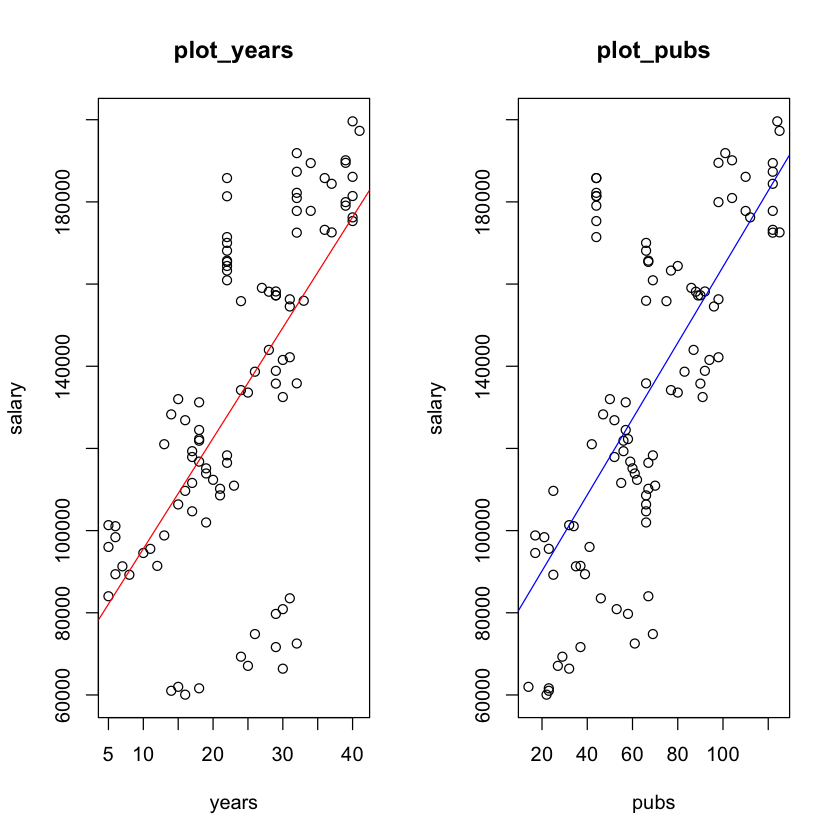

In [28]:
##visualize relationships salary ~ years, salary ~ publicaions
model_years <- lm(fs$salary ~ fs$years)
model_pubs <- lm(fs$salary ~ fs$pubs)
# Plot both enhanced scatter plots in one plot matrix of 1 by 2
par(mfrow = c(1, 2))
plot(fs$salary~fs$years, main ="plot_years", xlab = "years", ylab = "salary")
abline(model_years,col="red")
plot(fs$salary~fs$pubs, main = "plot_pubs", xlab = "pubs", ylab = "salary")
abline(model_pubs, col="blue")

In [29]:
##compare a model with 1 predictor and 2 predictor variables
model_1 <- model_years
model_2 <- lm(fs$salary ~ fs$years + fs$pubs)
r_squared <- c(summary(model_1)$r.squared, summary(model_2)$r.squared )
print(paste('how r squared evolves: ',paste(r_squared, collapbse= ' ')))

[1] "how r squared evolves:  0.421391615178524  " "how r squared evolves:  0.545127063012723  "


In [30]:
#adding more predictors might not be useful
model_3 <- lm(fs$salary ~ fs$years + fs$pubs + fs$age)
print(summary(model_3))
#observe large p-value near age predictor
#and the r-squared is only marginally increased
#-> coefficient for age tends to be insignificant


Call:
lm(formula = fs$salary ~ fs$years + fs$pubs + fs$age)

Residuals:
   Min     1Q Median     3Q    Max 
-70488 -14268   2502  13233  70413 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  51538.4    13726.9   3.755 0.000298 ***
fs$years      1210.0      436.5   2.772 0.006691 ** 
fs$pubs        618.9      126.5   4.894 3.98e-06 ***
fs$age         227.2      355.6   0.639 0.524444    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27010 on 96 degrees of freedom
Multiple R-squared:  0.5471,	Adjusted R-squared:  0.5329 
F-statistic: 38.65 on 3 and 96 DF,  p-value: < 2.2e-16



#### the most significant predictor is a predictor with the biggest z-scaled coefficient

In [31]:
z_model_2<-lm(scale(fs$salary) ~ scale(fs$years) + scale(fs$pubs) )
summary(z_model_2) # it is fs$pus


Call:
lm(formula = scale(fs$salary) ~ scale(fs$years) + scale(fs$pubs))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.71616 -0.36910  0.05975  0.33795  1.76115 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.911e-16  6.814e-02   0.000 1.000000    
scale(fs$years) 3.227e-01  9.342e-02   3.455 0.000819 ***
scale(fs$pubs)  4.799e-01  9.342e-02   5.137 1.44e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6814 on 97 degrees of freedom
Multiple R-squared:  0.5451,	Adjusted R-squared:  0.5357 
F-statistic: 58.12 on 2 and 97 DF,  p-value: < 2.2e-16


## Correlation matrix 

It can be computed in matrix multiplication as 

$$ R_{XX} = (SD_{XX})^{-1} C_{XX} (SD_{XX})^{-1} $$
where $SD_{XX}$ is a matrix of standard deviations  on diagonal  and $C_{XX}$ is a variance-covariance matrix

Example of explicit calculation below

In [32]:
#example matrix input
col1<-c(3,3,2,4,4,5,2,3,5)
col2<-c(2,2,4,3,4,4,5,3,3,5)
col3<-c(3,3,4,4,3,3,4,2,4,4)
X <- cbind(col1,col2,col3)
X

Warning message:
In cbind(col1, col2, col3): number of rows of result is not a multiple of vector length (arg 1)

col1,col2,col3
3,2,3
3,2,3
2,4,4
4,3,4
4,4,3
5,4,3
2,5,4
3,3,2
5,3,4
3,5,4


In [33]:
#identity matrix

I<-matrix(1,10,1)
#matrix of sum of columns
t_mat <- t(I) %*% X 
t_mat

col1,col2,col3
34,35,34


In [34]:
#vector of means
n<-nrow(X) # number of observations per column, 10
M <- t_mat * n^-1
M

col1,col2,col3
3.4,3.5,3.4


In [35]:
##matrix of means (10,x)
MM <- matrix(1,10,1) %*% M 
MM

col1,col2,col3
3.4,3.5,3.4
3.4,3.5,3.4
3.4,3.5,3.4
3.4,3.5,3.4
3.4,3.5,3.4
3.4,3.5,3.4
3.4,3.5,3.4
3.4,3.5,3.4
3.4,3.5,3.4
3.4,3.5,3.4


In [36]:
#matrix of deviations
D <- X - MM 

In [37]:
#matrix of sum of squares and sum of cross products
S <- t(D) %*% D 

In [38]:
#variance-covariance matrix
C <- S * n^-1 #variance on diagnoal, cov off-diagonal
C

,col1,col2,col3
col1,1.04,-0.20,-0.06
col2,-0.20,1.05,0.30
col3,-0.06,0.30,0.44


In [39]:
#standard deviation diagonal matrix (sd on diagonal, zeros off diagonal)
SD <- diag( diag(C)^0.5,  nrow=3,ncol=3)
SD # note that SD is symmetric,  i.e. t(SD) = SD

1.019804,0.000000,0.000000
0.000000,1.024695,0.000000
0.000000,0.000000,0.663325


In [40]:
#correlation matrix 
R <- solve(SD) %*% C %*% solve(SD)  #solve(SD) is inverse of SD
R  # observe R is symmetric as expected

1.00000000,-0.19138975,-0.08869686
-0.1913898,1.0000000,0.4413674
-0.08869686,0.44136741,1.00000000


### Dummy coding

A system to code categorical predictors (factor variables)

E.g. professors  belonging to different area of research 
 * Cognitive
 * Clinical
 * Developmental
 * Social
 
 #### Method
 
 Assign 0 to 1 category (e.g. Cognitive)
 assign 1 to each of other category i.e. 
 

 |               | D1|D2|D3|
 |---------------|---|--|--|
 | Cognitive     | 0 |0 |0 |
 | Clinical      | 1 |0 |0 |
 | Developmental | 0 |1 |0 |
 | Social        | 0 |0 |1 |
 
 

In [41]:
#in fs dataset a categorical variable is fs$dept
library(psych)
describeBy(fs, fs$dept)


group: H
       vars  n      mean       sd median   trimmed      mad   min    max range  skew kurtosis      se
salary    1 28 137421.29 33736.24 138411 137679.38 45224.49 89387 181427 92040 -0.04    -1.61 6375.55
age       2 28     49.04    11.00     48     49.04    14.08    32     66    34 -0.01    -1.37    2.08
years     3 28     22.25    10.95     22     22.21    14.08     5     40    35 -0.03    -1.34    2.07
pubs      4 28     63.32    29.13     57     62.62    28.17    17    122   105  0.29    -1.14    5.50
dept*     5 28      1.00     0.00      1      1.00     0.00     1      1     0   NaN      NaN    0.00
------------------------------------------------------------------------------------------------------------------------ 
group: P
       vars  n      mean       sd median   trimmed      mad   min    max  range  skew kurtosis      se
salary    1 35 129067.37 43738.84 131222 130061.03 48036.24 60072 189447 129375 -0.18    -1.33 7393.21
age       2 35     48.23     9.63     45  

In [42]:
# Create the dummy variables
dept_code <- dummy.code(fs$dept)

In [46]:
# Merge the dataset in an extended dataframe
extended_fs <- cbind(dept_code, fs)


In [47]:
#print summary of extended dataset
summary(extended_fs)

       H              P              S            salary            age            years            pubs        dept  
 Min.   :0.00   Min.   :0.00   Min.   :0.00   Min.   : 60072   Min.   :31.00   Min.   : 5.00   Min.   : 14.00   H:28  
 1st Qu.:0.00   1st Qu.:0.00   1st Qu.:0.00   1st Qu.:101818   1st Qu.:44.00   1st Qu.:17.75   1st Qu.: 44.00   P:35  
 Median :0.00   Median :0.00   Median :0.00   Median :133049   Median :49.00   Median :23.50   Median : 66.00   S:37  
 Mean   :0.28   Mean   :0.35   Mean   :0.37   Mean   :133607   Mean   :50.33   Mean   :24.14   Mean   : 66.93         
 3rd Qu.:1.00   3rd Qu.:1.00   3rd Qu.:1.00   3rd Qu.:170374   3rd Qu.:59.00   3rd Qu.:31.25   3rd Qu.: 90.00         
 Max.   :1.00   Max.   :1.00   Max.   :1.00   Max.   :199606   Max.   :67.00   Max.   :41.00   Max.   :125.00         

### the model on dummy codes

$$ \hat{Y} = B_0 + B_1*D1 + B_2*D2 + B_3*D3 $$

In [52]:
model <- lm(fs$salary ~ fs$years + fs$pubs)
# Create dummies for the categorical variable fs$dept by using the C() function
dept_code <- C(fs$dept, treatment) # observe treatment as a second argument
# Regress salary against years, publications and department 
model_dummy <- lm(fs$salary ~ fs$years + fs$pubs + dept_code)
summary(model_dummy)


Call:
lm(formula = fs$salary ~ fs$years + fs$pubs + dept_code)

Residuals:
   Min     1Q Median     3Q    Max 
-59233 -12490  -1488  13227  67294 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  62365.4     8299.0   7.515 3.13e-11 ***
fs$years      1507.8      379.4   3.974 0.000138 ***
fs$pubs        655.5      120.2   5.452 3.93e-07 ***
dept_codeP   -5872.8     6621.8  -0.887 0.377381    
dept_codeS  -18847.7     6706.6  -2.810 0.006011 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26080 on 95 degrees of freedom
Multiple R-squared:  0.5824,	Adjusted R-squared:  0.5648 
F-statistic: 33.12 on 4 and 95 DF,  p-value: < 2.2e-16


In [53]:
anova(model,model_dummy) # observe p-value significante , sum of squared resdiuals is smaller, i.e. model is better

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1,97,70358371292,NA,NA,NA,NA
2,95,64593818068,2,5764553224,4.239048,0.01724134


### unweighted effects coding

In [56]:
dept.f <- factor(fs$dept)

# Assign the 3 levels generated in step 2 to dept.f
contrasts(dept.f) <-contr.sum(3)

# Regress salary against dept.f
model_unweighted <- lm(fs$salary ~ dept.f)

# Apply the summary() function
summary(model_unweighted)


Call:
lm(formula = fs$salary ~ dept.f)

Residuals:
   Min     1Q Median     3Q    Max 
-68995 -27249   1488  36471  64590 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   133835       4007  33.403   <2e-16 ***
dept.f1         3586       5907   0.607    0.545    
dept.f2        -4767       5579  -0.855    0.395    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39780 on 97 degrees of freedom
Multiple R-squared:  0.007771,	Adjusted R-squared:  -0.01269 
F-statistic: 0.3799 on 2 and 97 DF,  p-value: 0.685
